In [102]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    BaggingClassifier, 
    RandomForestClassifier, 
    ExtraTreesClassifier, 
    AdaBoostClassifier,
    StackingClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)

# to do PCA 
from sklearn.decomposition import PCA

# for cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

set_config(display='diagram')

from joblib import dump
from joblib import load


In [103]:
df = pd.read_csv('mitomycinTrain.tsv', sep='\t')

In [104]:
df.head()

,Mitomycin_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,0,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,0,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,1,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,0,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


In [105]:
df.columns = df.columns.str.replace('.', '-')

C:\Users\madhu\AppData\Local\Temp/ipykernel_28588/2875486294.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '-')


In [106]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,Mitomycin_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_RNA5-8S5,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin
Breast_SQ68,0,0,0,0,0,0,0,1,0,0,...,7.430427,0.379076,0,0,1,0,0,0,0,0
Breast_EI813,0,0,0,0,0,0,0,0,0,0,...,9.509599,1.445901,0,0,1,0,0,0,0,0
Breast_PV9,1,0,0,0,0,1,0,1,0,0,...,7.672418,0.230426,0,0,1,0,0,0,0,0
Breast_KY76,0,0,0,0,0,0,0,0,0,0,...,4.727648,0.222489,0,0,1,0,0,0,0,0
Breast_EPQV2,0,0,0,0,1,0,1,0,0,0,...,10.491553,2.474496,0,0,1,0,0,0,0,0


In [107]:
# variances = df.var()

# # Get column indices where variance is zero
# zero_variance_cols = variances[variances == 0].index

In [108]:
# # Drop columns with zero variance
# df = df.drop(columns=zero_variance_cols)
# df.shape

# SPLITTING 

In [109]:
X = df.drop('Mitomycin_response', axis = 1)
y = df['Mitomycin_response']

In [110]:
y.value_counts()

0    27
1    21
Name: Mitomycin_response, dtype: int64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify = y)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 38
Number of rows in test data = 10


In [112]:
y_test.value_counts()

0    6
1    4
Name: Mitomycin_response, dtype: int64

# SCALING

In [113]:
scaler = MinMaxScaler()
 
# Scale the Data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# OVER-SAMPLING

In [114]:
# Assign y_train as a new column to X_train DataFrame
X_train['TargetColumn'] = y_train.values

In [115]:
#weights = [10 if TargetColumn > 0.5 else 1 for TargetColumn in X_train.TargetColumn] #weights not needed since random sampling
sample = X_train.sample(700, replace = True)
sample.head()

,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,mut_CDCP2,...,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin,TargetColumn
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.400361,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.895683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.462794,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
31,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.195150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
36,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.137213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [116]:
sample['TargetColumn'].value_counts()

0    396
1    304
Name: TargetColumn, dtype: int64

In [117]:
# Oversample the minority class by duplicating samples
oversampled = pd.concat([X_train, sample], axis=0, ignore_index=True)
oversampled.shape

(738, 15997)

In [118]:
# Shuffle the DataFrame using sample() method
shuffled_df = oversampled.sample(frac=1, random_state=42)  # frac=1 shuffles all rows, random_state for reproducibility

# Reset the index if needed
shuffled_df.reset_index(drop=True, inplace=True)

In [119]:
X_train = shuffled_df.drop('TargetColumn', axis = 1)
y_train = shuffled_df['TargetColumn'].values

# MODELLING PART

# Lasso Logistic Regression

In [120]:
# Create a Logistic Regression model with L1 (Lasso) regularization
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=42)  # Adjust C for regularization strength

# Fit the model on the training data
lasso_logreg.fit(X_train, y_train)

# Save the trained model to a file
dump(lasso_logreg, 'mito_lasso.joblib')

# Predict on the test set
y_pred = lasso_logreg.predict(X_test)

y_pred_train = lasso_logreg.predict(X_train)
print("Accuracy on train:", accuracy_score(y_train, y_pred_train))

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy on train: 1.0
Accuracy: 0.7


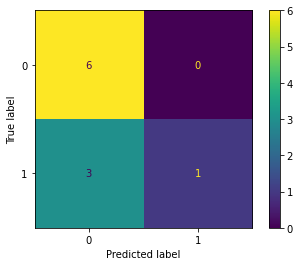

In [121]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [122]:
# Retrieve coefficients and intercept
coefficients = lasso_logreg.coef_
intercept = lasso_logreg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.          0.          0.         ... -0.78438741  0.
   0.        ]]
Intercept: [0.]


In [123]:
# Retrieve coefficients greater than zero and their column indices
coefficients = lasso_logreg.coef_[0]  # Assuming binary classification, extracting coefficients for the first class

non_zero_coefficients = [(index, coef) for index, coef in enumerate(coefficients) if coef != 0]

sorted_coefficients = sorted(non_zero_coefficients, key=lambda x: abs(x[1]), reverse=True)

print("Coefficients:")
for index, coef in sorted_coefficients:
    print(f"{X_train.columns[index]}: {coef}")

Coefficients:
rna_SNORA74A: 1.3272326610905947
rna_ADGRB1: 1.3202657623983152
rna_JAM3: 1.2972640344599418
rna_SNORA62: 1.216942661918458
rna_TGFBR3: -1.2130764531039817
rna_TMEM133: -1.1012867258532335
rna_ALDH1L2: -1.0861916123970727
mut_ZNF474: -1.0225734600639886
rna_ESRP1: -0.9092148062075582
rna_MST1R: -0.8425057843020289
rna_NID1: 0.8230002922917725
type_Ovary: -0.7843874124071321
rna_LOC494127: 0.7220013755649525
rna_SCARNA13: 0.7043613436093235
rna_WWOX: 0.700304993841792
rna_HIST1H2BI: 0.6891788742458734
rna_ISG20: -0.6178397287413478
rna_HCN2: 0.5703064792817821
rna_C19orf33: -0.5657653236470892
rna_ANP32AP1: 0.5639348416604919
rna_SFMBT2: 0.5579385751465116
rna_SLC17A5: -0.5402479055928084
rna_ADM2: -0.5366902249355759
rna_SNORD22: 0.5196100016785065
rna_FAM83H: -0.5053860974139769
rna_CTAGE5: -0.5007302614613984
rna_TSHZ3: 0.4947007559761686
rna_PLSCR1: -0.4888357624531038
rna_BLOC1S5-TXNDC5: 0.4825814052157418
rna_RIPK4: -0.4803281170416916
rna_ARHGAP22: 0.433428879771143

In [124]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
cross_val_score(lasso_logreg, X_train, y_train, cv=cv, scoring='accuracy',)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [125]:
#using laeve one out cross validation
#cv = KFold(n_splits=38, shuffle=True, random_state=4)
#cross_val_score(lasso_logreg, X_train, y_train, cv=cv, scoring='accuracy',)

In [126]:
columns = []
for index, coef in non_zero_coefficients:
    columns.append(X_train.columns[index])

columns

['mut_BRINP3',
 'mut_ALMS1',
 'mut_NIPBL',
 'mut_ZNF474',
 'mut_RELN',
 'mut_SBNO1',
 'rna_OXCT2',
 'rna_TGFBR3',
 'rna_ILDR2',
 'rna_LAMC2',
 'rna_NCF2',
 'rna_ACTA1',
 'rna_NID1',
 'rna_LOC100130331',
 'rna_GFPT1',
 'rna_ADD2',
 'rna_LINC01291',
 'rna_NPAS2',
 'rna_POTEF',
 'rna_POTEE',
 'rna_GALNT3',
 'rna_PHOSPHO2',
 'rna_PRRT3-AS1',
 'rna_SNORA62',
 'rna_MST1R',
 'rna_GNAI2',
 'rna_C3orf52',
 'rna_ATP6V1A',
 'rna_PLSCR1',
 'rna_VEPH1',
 'rna_MFN1',
 'rna_SNORA26',
 'rna_INPP4B',
 'rna_SNORA47',
 'rna_SNORA74A',
 'rna_CYSTM1',
 'rna_DSP',
 'rna_BLOC1S5-TXNDC5',
 'rna_BLOC1S5',
 'rna_HIST1H2BI',
 'rna_HIST1H2AG',
 'rna_HIST1H2BN',
 'rna_SLC17A5',
 'rna_CTAGE9',
 'rna_BAIAP2L1',
 'rna_TES',
 'rna_PCMTD1',
 'rna_WWP1',
 'rna_RIPK2',
 'rna_ESRP1',
 'rna_ATP6V1C1',
 'rna_ADGRB1',
 'rna_FAM83H',
 'rna_LOC494127',
 'rna_IL15RA',
 'rna_SFMBT2',
 'rna_MEIG1',
 'rna_ARHGAP22',
 'rna_DPYSL4',
 'rna_SNORD22',
 'rna_PPFIA1',
 'rna_TMEM133',
 'rna_JAM3',
 'rna_ALDH1L2',
 'rna_STK24',
 'rna_BCL2L

In [127]:
len(columns)

102

In [128]:
strings_to_check = ['type_Breast', 'type_BrainCNS', 'type_Bowel', 'type_Blood', 'type_Skin', 'type_Lung', 'type_Ovary', 'type_Prostate', 'type_Kidney']
present_strings = [string for string in strings_to_check if any(string in name for name in columns)]

# Print the result
print("Strings present in the array names:", present_strings)

Strings present in the array names: ['type_Ovary']
